In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Controller.My_math.maths import build_B
from Controller.controller_cons import control_law 
from GVF_trajectory.GVF_Circle import gvf_circumference

from integrartor import  integrator

# N=1

In [2]:
gvf = gvf_circumference([0,0], 80)

N = 1
s = np.array([100, 90])
Z = [(0,0)]
system = integrator(s, 15, gvf, N, Z, 0, 0.9)

t_final = 100
dt = 0.01
sol = system.run_simulation(dt, t_final)

[255]


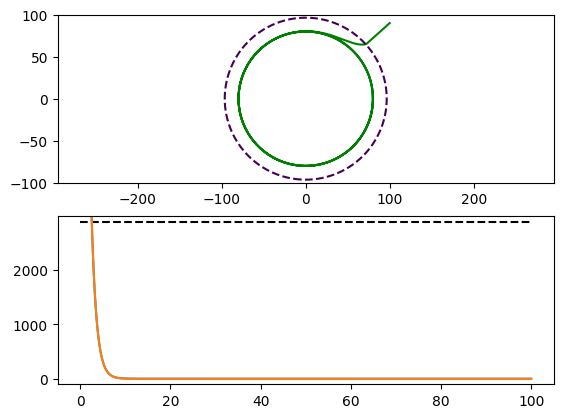

In [3]:
fig, (ax1, ax2) = plt.subplots(2,1)
x_cir, y_cir = gvf.gen_circumference_points(1000)
ax1.plot(x_cir, y_cir)
ax1.axis("equal")

states = sol
x = states[0,:]
y = states[1,:]
ax1.plot(x, y, color="green")

t = np.linspace(0, t_final, len(x))

phi = np.zeros(len(x))
e0 = np.zeros(len(x))
index = []
for i in range(x.shape[0]):
    phi[i] = gvf.phi([x[i],y[i]])
    e0[i] = ((states[0,i] - gvf.x0)**2+(states[1,i] - gvf.y0)**2-gvf.radius**2) / 2 / np.sqrt((states[0,i] - gvf.x0)**2+(states[1,i] - gvf.y0)**2) - system.speed
    if (e0[i] > -0.07 and e0[i] < 0.07):
        index.append(i)

print(index)
e0 = gvf.phi([x[index[0]], y[index[0]]])
ax2.hlines(e0, 0, t_final, linestyles="--", colors="black")
ax2.plot(t,phi)
hunche = e0 * np.exp(-0.9*(t-t[index[0]]))
ax2.plot(t, hunche)
ax2.set_ylim((-100, e0+100))

x_dom = np.linspace(-200, 200, 1000)
y_dom = np.linspace(-100, 100, 1000)

X_dom,Y_dom = np.meshgrid(x_dom, y_dom)
dom = ((X_dom - gvf.x0)**2+(Y_dom - gvf.y0)**2-gvf.radius**2) / 2 / np.sqrt((X_dom - gvf.x0)**2+(Y_dom - gvf.y0)**2) - system.speed

ax1.contour(X_dom, Y_dom, dom, levels=[0], linestyles='dashed')

# N=2

In [16]:
gvf = gvf_circumference([0,0], 80)
N = 2
s = np.array([100,0,0,100])
Z = [(0,1)]
system = integrator(s, 15, gvf, N, Z, 0.25, 0.9)
#system.dynamics(1, s)


t_final = 100
sol = system.run_simulation(0.01, t_final)


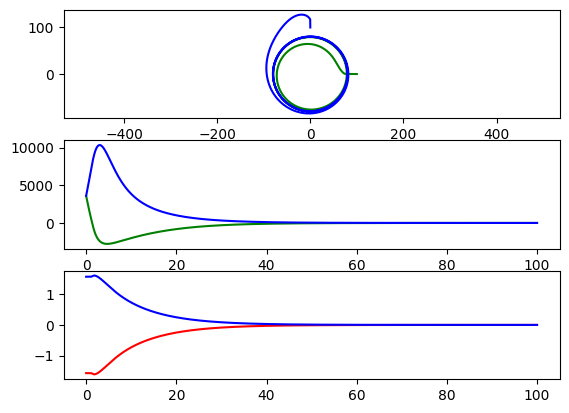

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
x_cir, y_cir = gvf.gen_circumference_points(1000)
ax1.plot(x_cir, y_cir)
ax1.axis("equal")


states = sol
ax1.plot(states[0,:], states[1,:], color="green")
ax1.plot(states[2,:], states[3,:], color="blue")

phi = np.zeros((states[0,:].shape[0], 2))
e_theta = np.zeros(states[0,:].shape[0])
for i in range(states[0,:].shape[0]):
    phi[i, 0] = gvf.phi([states[0,i], states[1,i]])
    phi[i, 1] = gvf.phi([states[2,i], states[3,i]])
    theta1 = np.atan2(states[0, i], states[1, i])
    theta2 = np.atan2(states[2, i], states[3, i])
    c2 = np.cos(theta1)
    s2 = np.sin(theta1)
    c1 = np.cos(theta2)
    s1 = np.sin(theta2)
    e_theta[i] = np.atan2(s1 * c2 - c1 * s2, c1 * c2 + s1 * s2)


t = np.linspace(0, t_final, states[0,:].shape[0])
ax2.plot(t, phi[:,0], color="green")
ax2.plot(t, phi[:,1], color="blue")
ax3.plot(t, e_theta, color="red")
ax3.plot(t, -e_theta, color="blue")

# N= 4

In [22]:
gvf = gvf_circumference([0,0], 80)
N = 4
s = np.array([100, 90, 0, 100, 200, 90, 10, -30])
Z = [(0,1), (1,2), (2,3)]
system = integrator(s, 15, gvf, N, Z, 0.3, 0.9)

t_final = 100
sol = system.run_simulation(0.01, t_final)

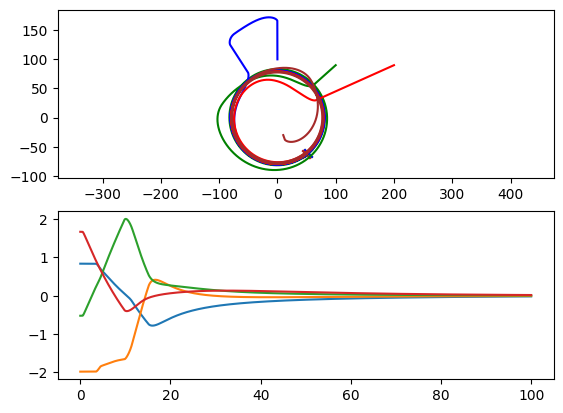

In [23]:
fig, (ax1, ax2) = plt.subplots(2,1)
x_cir, y_cir = gvf.gen_circumference_points(1000)
ax1.plot(x_cir, y_cir)
ax1.axis("equal")


states = sol

ax1.plot(states[0,:], states[1,:], color="green")
ax1.plot(states[2,:], states[3,:], color="blue")
ax1.plot(states[4,:], states[5,:], color="red")
ax1.plot(states[6,:], states[7,:], color="brown")
n = len(states[0,:])
n=n-1
ax1.scatter(states[0,n], states[1,n], color="green", marker="x")
ax1.scatter(states[2,n], states[3,n], color="blue", marker="x")
ax1.scatter(states[4,n], states[5,n], color="red", marker="x")
ax1.scatter(states[6,n], states[7,n], color="brown", marker="x")

B = build_B(Z, N)
theta = np.zeros((N,len(states[0,:])))

for i in range(N):
    theta[i, :] = np.atan2(states[2*i+1, :], states[2*i, :])


e_theta = np.zeros((len(Z),len(states[0,:])))
for i in range(len(Z)):
    index1, index2 = Z[i]
    c2 = np.cos(theta[index1, :])
    s2 = np.sin(theta[index1, :])
    c1 = np.cos(theta[index2, :])
    s1 = np.sin(theta[index2, :])
    e_theta[i, :] = np.atan2(s1 * c2 - c1 * s2, c1 * c2 + s1 * s2)

t = np.linspace(0, t_final, len(states[0,:]))
E_theta = B @ e_theta
ax2.plot(t, E_theta[0, :])
ax2.plot(t, E_theta[1, :])
ax2.plot(t, E_theta[2, :])
ax2.plot(t, E_theta[3, :])
plt.show()


